<a href="https://colab.research.google.com/github/Saurabh07703/EDA_Repo/blob/main/UCI_Census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import gym

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

In [ ]:
columns = [
    "age", "workclass","fnlwgt","education","education-num","marital-status","occupation","relationship",
    "race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"
    ]

In [ ]:
data = pd.read_csv(url,header=None,names=columns,na_values=" ?",skipinitialspace=True)

In [ ]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
data.dropna(inplace=True)
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
categorical_cols = data.select_dtypes(include=["object"]).columns
categorical_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [ ]:
label_encoders = {col: LabelEncoder() for col in categorical_cols}
label_encoders

{'workclass': LabelEncoder(),
 'education': LabelEncoder(),
 'marital-status': LabelEncoder(),
 'occupation': LabelEncoder(),
 'relationship': LabelEncoder(),
 'race': LabelEncoder(),
 'sex': LabelEncoder(),
 'native-country': LabelEncoder(),
 'income': LabelEncoder()}

In [ ]:
for col in categorical_cols:
  data[col] = label_encoders[col].fit_transform(data[col])

In [ ]:
X = data.drop(columns=["income"])
Y = data["income"]
X,Y

(       age  workclass  fnlwgt  education  education-num  marital-status  \
 0       39          7   77516          9             13               4   
 1       50          6   83311          9             13               2   
 2       38          4  215646         11              9               0   
 3       53          4  234721          1              7               2   
 4       28          4  338409          9             13               2   
 ...    ...        ...     ...        ...            ...             ...   
 32556   27          4  257302          7             12               2   
 32557   40          4  154374         11              9               2   
 32558   58          4  151910         11              9               6   
 32559   22          4  201490         11              9               4   
 32560   52          5  287927         11              9               2   
 
        occupation  relationship  race  sex  capital-gain  capital-loss  \
 0         

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
X_train, X_test, Y_train, Y_test

(       age  workclass  fnlwgt  education  education-num  marital-status  \
 5514    33          2  198183          9             13               4   
 19777   36          4   86459          8             11               2   
 10781   58          6  203039          6              5               5   
 32240   21          4  180190          8             11               2   
 9876    27          4  279872         15             10               0   
 ...    ...        ...     ...        ...            ...             ...   
 29802   47          4  359461          9             13               2   
 5390    31          4  147215          2              8               0   
 860     18          4  216284          1              7               4   
 15795   50          6   54261         11              9               2   
 23654   34          5  127651          9             13               0   
 
        occupation  relationship  race  sex  capital-gain  capital-loss  \
 5514      

In [ ]:
scaler = StandardScaler()
X_Train = scaler.fit_transform(X_train)
X_Test = scaler.transform(X_test)

In [ ]:
X_Train, X_Test

(array([[-0.40875606, -1.28658909,  0.08005085, ..., -0.21799808,
          0.77946024,  0.29281769],
        [-0.1888573 ,  0.08847544, -0.98165286, ...,  4.45716784,
          0.77946024,  0.29281769],
        [ 1.42373357,  1.46353996,  0.126197  , ..., -0.21799808,
         -0.03151042,  0.29281769],
        ...,
        [-1.50824984,  0.08847544,  0.25206312, ..., -0.21799808,
         -1.65345173,  0.29281769],
        [ 0.83733689,  1.46353996, -1.28762772, ..., -0.21799808,
          3.53676046,  0.29281769],
        [-0.33545648,  0.7760077 , -0.59020877, ..., -0.21799808,
          1.59043089,  0.29281769]]),
 array([[-0.84855357,  0.08847544, -0.28110745, ..., -0.21799808,
         -0.19370455,  0.29281769],
        [ 0.47083896,  2.15107222, -1.32273149, ..., -0.21799808,
         -0.03151042,  0.29281769],
        [-0.7019544 ,  0.08847544, -0.03659744, ..., -0.21799808,
          1.18494556,  0.29281769],
        ...,
        [ 0.61743814,  0.08847544,  1.56217302, ..., -

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
print(f"Accuracy: {accuracy_score(Y_test, y_pred)}")
print("Classification Report:")
print(classification_report(Y_test, y_pred))

Accuracy: 0.8616612927990174
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4942
           1       0.75      0.64      0.69      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.79      0.80      6513
weighted avg       0.86      0.86      0.86      6513



In [ ]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[4601,  341],
       [ 560, 1011]])

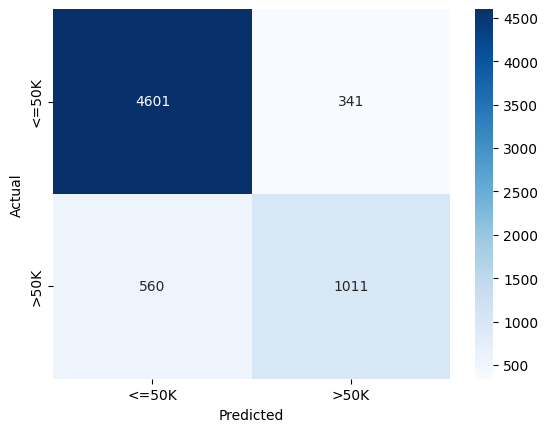

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoders["income"].classes_, yticklabels=label_encoders["income"].classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred_reg = regressor.predict(X_test)
y_pred_reg

array([0., 0., 1., ..., 1., 0., 0.])

In [ ]:
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.13833870720098265


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

In [ ]:
data["Cluster"] = clusters
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Cluster
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0,1
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0,1


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca

array([[-112262.32967104,    1099.91712363],
       [-106467.39574847,   -1074.2578358 ],
       [  25867.60414285,   -1078.28359017],
       ...,
       [ -37868.39597084,   -1076.34115994],
       [  11711.60436502,   -1077.85782144],
       [  98149.06015905,   13943.4957516 ]])

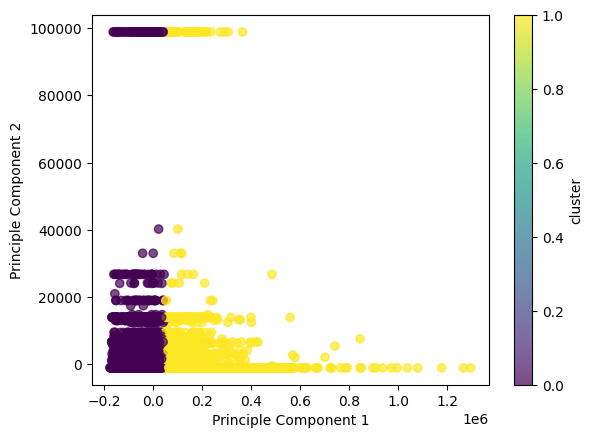

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = clusters, cmap = "viridis", alpha = 0.7)
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.colorbar(label="cluster")
plt.show()

In [ ]:
env  = gym.make("CartPole-v1")

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
episodes = 5
for episode in range(episodes):
  state = env.reset()
  done = False
  total_reward = 0
  while not done:
    action = env.action_space.sample()
    next_state, reward, done, _ = env.step(action)
    total_reward += reward
    env.render()
  print(f"Episode: {episode + 1} : Total Reward = {total_reward}")
env.close()

/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/usr/local/lib/python3.11/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.11/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.11

Episode: 1 : Total Reward = 25.0
Episode: 2 : Total Reward = 12.0
Episode: 3 : Total Reward = 31.0
Episode: 4 : Total Reward = 11.0
Episode: 5 : Total Reward = 17.0


In [ ]:
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending = False)
feature_importances

,Feature,Importance
2,fnlwgt,0.168266
0,age,0.154097
10,capital-gain,0.115538
7,relationship,0.100978
4,education-num,0.087477
12,hours-per-week,0.083433
6,occupation,0.069261
5,marital-status,0.064743
1,workclass,0.040906
11,capital-loss,0.035643


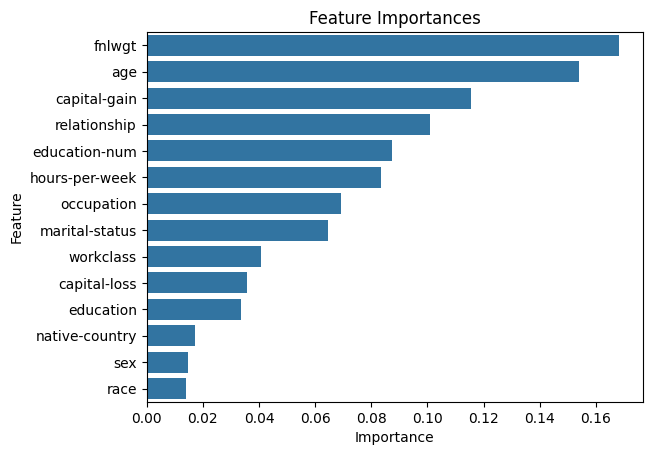

In [ ]:
sns.barplot(x="Importance", y="Feature",data=feature_importances)
plt.title("Feature Importances")
plt.show()

In [ ]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),param_grid=param_grid,cv=3,scoring="accuracy")
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.861985698828592


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
